In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
im = plt.imread(r'section 2\images\rosa.jpg')

In [3]:
im3 = im.copy()

In [4]:
im3[140:190,339:405]= 255 # left eye

In [5]:
im3[136:186,460:530]= 255 #right eye

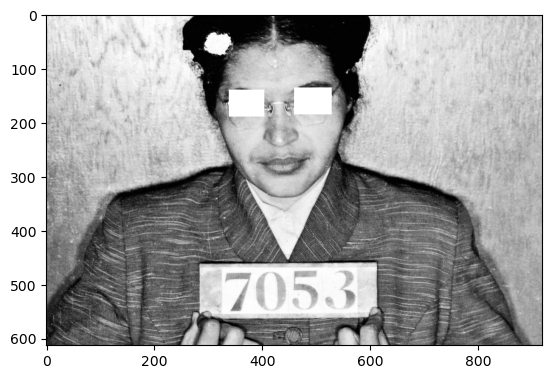

In [6]:
plt.imshow(im3,cmap='gray')

In [7]:
! pip install opencv-contrib-python

# Grayscale Images in OpenCV

In [8]:
import cv2

In [9]:
img = cv2.imread(r'section 2\images\rosa.jpg',cv2.IMREAD_GRAYSCALE)

In [10]:
#img = cv2.imread(r'section 2\images\rosa.jpg',cv2.IMREAD_GRAYSCALE)

In [11]:
type(img)

numpy.ndarray

In [12]:
img.dtype

dtype('uint8')

In [13]:
img.shape

(613, 920)

In [14]:
img[23,100]=200

In [15]:
#plt.imshow(img,cmap='gray') # using plt

In [ ]:
#using open cv to view image in separate window

In [19]:
cv2.imshow('Gray',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [18]:
img[500:700,500:600] = 255

In [ ]:
#showing white patch

In [22]:
#save image
cv2.imwrite(r'section 2\images\rosa_white_opencv.jpg',img)

True

# RGB 'COLOR' Images

In [24]:
cim = plt.imread(r'section 2\images\tropical-bird.jpg')

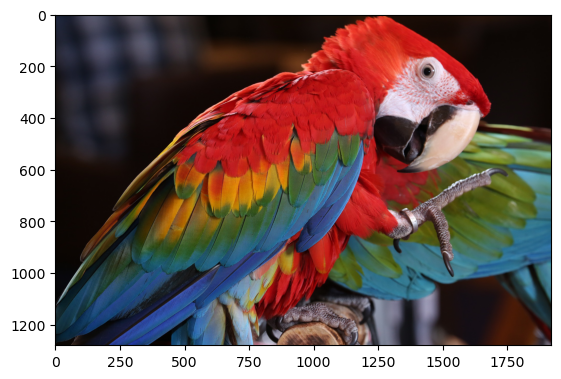

In [25]:
plt.imshow(cim)

In [26]:
cim.shape

(1280, 1920, 3)

In [27]:
type(cim)

numpy.ndarray

# Three chanel 


- OpenCV reads as BGR
- Order not RGB

In [39]:
#cim = plt.imread(r'section 2\images\tropical-bird.jpg')

In [44]:
#order of 

cim = cv2.imread(r'section 2\images\tropical-bird.jpg') # please try to run to see the differences
cim = cim[:,:,::-1]
R = cim[:, :, 0]
G = cim[:, :, 1]
B = cim[:, :, 2]

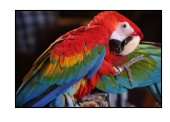

In [45]:
#display 
plt.figure(1)
plt.subplot(231) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.show()

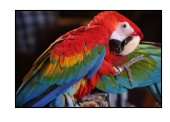

In [46]:
plt.figure(1)
plt.subplot(231) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.show()

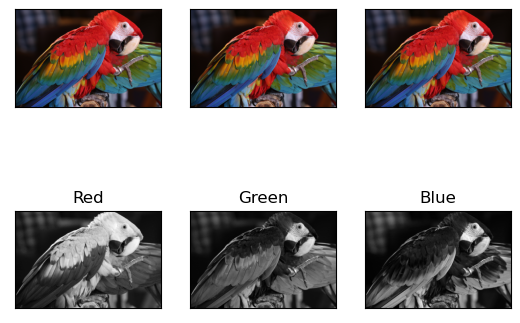

In [47]:
# copy and past 6 times
plt.subplot(231) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(232) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(233) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(234) #two rows three columns
plt.imshow(R,cmap='gray') # Red chanel change to gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Red')

plt.subplot(235) #two rows three columns
plt.imshow(G,cmap='gray') #Green chanel gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Green')

plt.subplot(236) #two rows three columns
plt.imshow(B,cmap='gray') # Blue chanel gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Blue')

plt.show()


In [54]:
# Manipulate band can change contribution of red level here. Pls test it out. (255,100,50,70)
# You might experience different color in your image 
# Red [255, 0, 0] # deep purple [100, 50, 70]

#R[100:400,100:400] = 100
#G[100:400,100:400] = 50
#B[100:400,100:400] = 70
R[100:400,100:400] = 255
G[100:400,100:400] = 0
B[100:400,100:400] = 0
cim[:, :, 0] = R
cim[:, :, 1] = G
cim[:, :, 2] = B

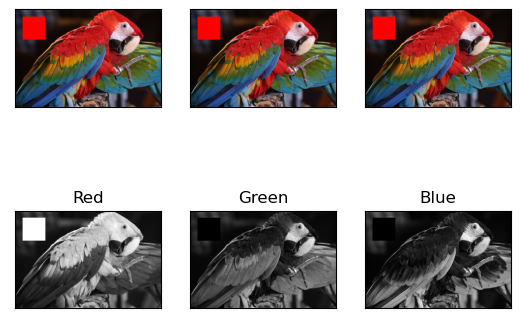

In [55]:
plt.subplot(231) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(232) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(233) #two rows three columns
plt.imshow(cim)
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])

plt.subplot(234) #two rows three columns
plt.imshow(R,cmap='gray') # Red chanel change to gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Red')

plt.subplot(235) #two rows three columns
plt.imshow(G,cmap='gray') #Green chanel gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Green')

plt.subplot(236) #two rows three columns
plt.imshow(B,cmap='gray') # Blue chanel gray
plt.xticks([]) #remove ticks bottom of image
plt.yticks([])
plt.title('Blue')

plt.show()

- red is highest with white patch, G and B have very small contribution of red

# RGB color images Matplotlib and OpenCV

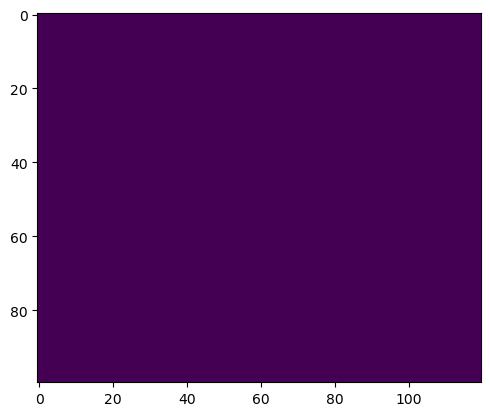

In [57]:
rgb = np.zeros((100,120 )) # 10 Rows, 120 columns every pixel will have three values
#display
plt.imshow(rgb)
# populate with 
#rgb = []

### Populate pixels 

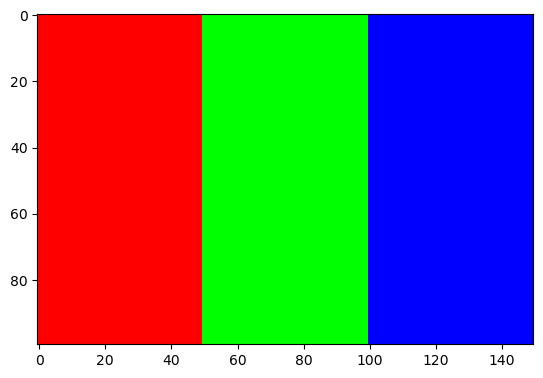

In [89]:
rgb = np.zeros((100,150,3), dtype='uint8') # 10 Rows, 150 columns every pixel will have three values
rgb[:,0:50,0] = 255 # red
rgb[:,50:100,1] = 255 # green instencity max
rgb[:,100:150,2] = 255 # blue
#display
plt.imshow(rgb)
# populate with 
#rgb = []

- showing first 50 of red
- 50 columns for green
- 50 columns for blue

In [66]:
cv2.imshow('RGB',img) 
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# now showing BGRColor
Space


# Color Space
- H = Hue (color in degree [0,360]
- S = Saturation [0,1]
- V = Value [0,1]

- Objective: Converion RGB to HSV
- R,G,B /255
- V = max = max(R,G,B), min = min (R,G,B)
- S =(max - min)/max (or S = 0, if V =0)

In [72]:
def f_rgb_to_hsv(r,g,b,scaleFactor):
    r,g,b = r/255.0, g/255.0, b/255.0 #normalize ensure is between 0 and 1
    cmax = max(r,g,b) # max of r, g, b
    cmin = min(r,g,b) # min of r, g, b
    diff = cmax-cmin  # diff of cmax and cmin
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60 * ((g - b) / diff) + 0) % 360
    elif cmax == g:
        h = (60 * ((b - r) / diff) + 120) % 360
    elif cmax == b:
        h = (60 * ((r - g) / diff) + 240) % 360    
    if h < 0: # is neg add 360 to it
        h = h + 360
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v
    

In [73]:
print(f_rgb_to_hsv(100,200,50,100)) 

(100.0, 75.0, 78.43137254901961)


### This is for one pixel
- Hue value is 100
- Saturation is 75
- Value or brigtness is 78.4

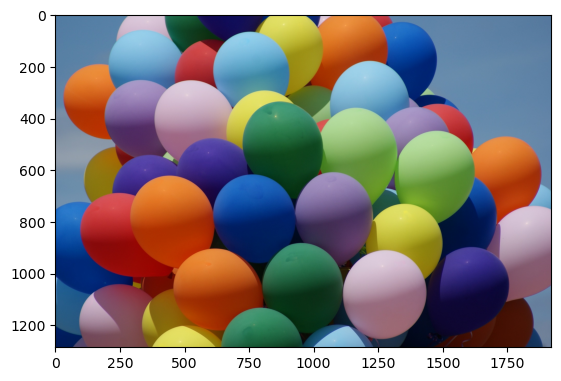

In [93]:
img = cv2.imread(r'section 2\images\balloons.jpg')
plt.imshow(img[:,:,::-1])

## Create in cv2
- Segment out red color

In [94]:
im = cv2.imread(r'section 2\images\balloons.jpg')

In [95]:
HsvIm = cv2.cvtColor(im,cv2.COLOR_BGR2HSV) # conversion here

In [96]:
type(HsvIm)

numpy.ndarray

In [97]:
HsvIm.shape

(1285, 1920, 3)

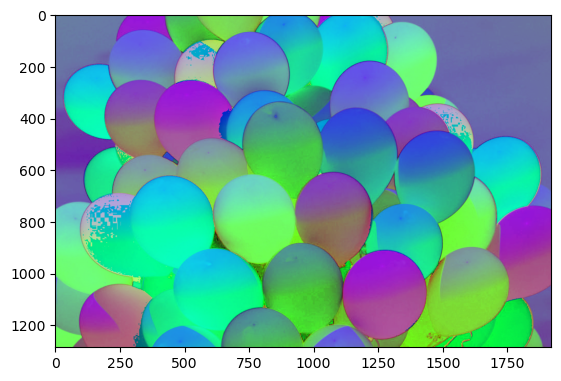

In [98]:
plt.imshow(HsvIm)

# Segment out red color 

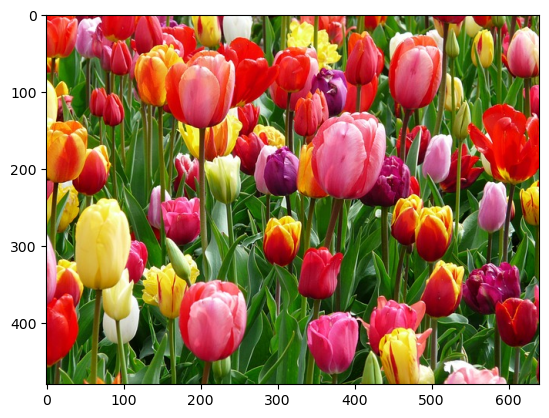

In [163]:
img = cv2.imread(r'section 2\images\tulips-2vey.jpg')
plt.imshow(img[:,:,::-1])

In [164]:
hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

In [165]:
lr = np.array([0,120,70])
ur = np.array([8,255,255]) # to make it more detable to red reduce 15 to 8
mask1 = cv2.inRange(hsv,lr,ur) # pixel range 

In [166]:
type(mask1)

numpy.ndarray

In [167]:
mask1.dtype

dtype('uint8')

In [168]:
mask1.shape

(480, 640)

In [169]:
mask1.max()

255

In [170]:
mask1.min()

0

In [171]:
# change range
lr = np.array([170,120,70])# to make it more detable to red reduce 160 to 170
ur = np.array([180,255,255])
mask2 = cv2.inRange(hsv,lr,ur) # pixel range 

In [172]:
np.unique(mask2) # 0 not present, 255 present 

array([  0, 255], dtype=uint8)

In [173]:
np.unique(mask1) # 0 not present, 255 present 

array([  0, 255], dtype=uint8)

In [174]:
mask = mask1 | mask2 # convert to bool

In [175]:
np.unique(mask)

array([  0, 255], dtype=uint8)

## Compute to mask

In [176]:
res = cv2.bitwise_and(img,img,mask=mask)

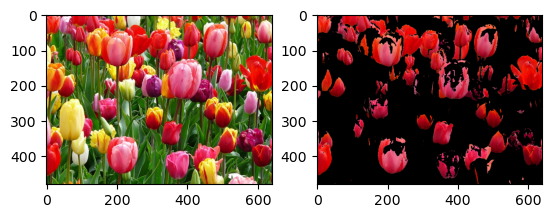

In [177]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()
                   

- Red color are detected 
- Orange color detected
- Pink color detected

# Extract yellow color 

In [178]:
# change yellow range from 20 to 30 according to google 
lr = np.array([20,100,100])# to make it more detable to red reduce 160 to 170
ur = np.array([30,255,255])
yellow_mask = cv2.inRange(hsv,lr,ur) # pixel range 
res = cv2.bitwise_and(img,img,mask=yellow_mask)

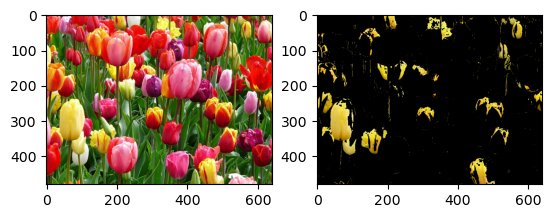

In [179]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:,:,::-1])
plt.subplot(122)
plt.imshow(res[:,:,::-1])
plt.show()

- Extracted out only yellow

# Hyperspectral Images
- Hypercube
- More than three chanels
- Wavelength NIR (rgb)
- Wavelength UV (rgb)
- Reflectance 
- Satelite images deal with material types
- Satelite id residential and landscape 